# Datos de dolar
Todos sabemos, como argentinos, la importancia que se le atribuye al dolar en una economia inflacionaria. Tambien conocemos la importancia de los datos para poder predecir con Machine Learning.

La obtencion de los datos muchas veces es la parte mas dificil de conseguir. Si queremos predecir el precio del dolar, necesitamos muchas filas de datos y muchas columnas de datos relevantes. Por ejemplo, podria imaginar que ciertas politicas monetarias del Banco Central afecten directamente en el precio del dolar, y nos podrian ayudar a predecir el proximo valor.

Sin embargo, conseguir datasets grandes de este estilo por lo general requiere mucho trabajo, y por lo tanto implican dinero.

Por suerte, tambien existe una pagina, llamada Kaggle, donde las personas suelen compartir sus datos: [kaggle](https://www.kaggle.com). Aqui muchas personas no solo comparten datasets, sino tambien codigo sobre el analisis de dichos datasets. Tambien existen competencias a las que se pueden unir, en busca de la gloria.

## Nuestro dataset
Conseguimos un dataset bastante completo en terminos de tiempo: este dataset consistia en el precio diario del dolar, en tres formatos: DolarBNA, DolarDivisaBNA y DolarAmbito. No somos economistas (lo cual hubiera ayudado al procesado de datos). Los precios abarcan desde 2003 hasta 2023.

### Objetivo
Nuestro objetivo es poder predecir el precio del dolar de "mañana", es decir, a partir de los ultimos X dias, predecir el precio que tendra el dolar en el dia X + 1.

### Modificacion del dataset a partir de nuestro objetivo
Para lograr esto, modificamos el dataset de la siguiente manera.

1. Los tres precios: **DolarBNA**, **DolarDIVISABNA** y **DolarAmbito**, lo convertimos en uno solo, ya que parecian tener una fuerte correlacion.
2. Las fluctuaciones diarias del dolar pueden ser muy "ruidosas" y depender de factores externos, mas alla de nuestra capacidad de prediccion. A nosotros en realidad nos interesan tendencias generales, mas alla de estas fluctuaciones diarias. Para eso se ralizo un "suavizado" de los datos. Que hace el suavizado? Basicamente, se convierte el valor del precio del dolar en un *promedio*
de los precios de los dias mas cercanos.
3. Hasta ahora solo tenemos ***una*** columna, que es la que queremos predecir (nuestra columna *y*) o *variable dependiente*. De donde saldran nuestras variables *independientes*? Esto es lo que hicimos:
   1. Lo que era nuestra unica columna es ahora nuestra columna *y*. Digamos que es el precio del dolar en el dia *n*.
   2. Una variable independiente sera el precio del dolar en el dia n-1.
   3. Otra variable independiente sera el precio del dolar en los ultimos 2 dias (promedio).
   4. Otra variable independiente sera el precio del dolar en los ultimos 3 dias (promedio).
   5. Otra variable independiente sera el precio del dolar en los ultimos 5 dias (promedio)..
   6. Etc
   7. Etc
   8. Etc
Ojo: tener en cuenta que la cantidad de dias exactos para cada columna puede variar. Lo importante es que convertimos datos anteriores a los que queremos predecir en columnas de *features*.
4. Ahora, con nuestra nueva base de datos, podemos empezar a entrenar un modelo. A continuacion te mostraremos el codigo de como obtuvimos los datos. Te *invitamos* a que lo cambies y experimentes con tu propio set de datos, aunque esto *no* es un requerimiento.  


### Extra: por que?
Porque optamos por estas columnas? Bueno, basicamente, a partir de una intuicion: queremos que los datos mas recientes tengan un impacto granular en el precio de mañana, pero que los datos mas distantes tengan un impacto que implique mas sobre la "tendencia". Es decir, me importa mas "la media" de los ultimos 90 dias, que el precio exacto del dolar hace 90 dias, ya que ese precio *intuitivamente* no tendra un impacto *directo* sobre el dolar de mañana, pero el precio *exacto* del dolar de ayer puede si tenerlo.
Repito, esto viene de una intuicion, y puede no ser correcta. Necesitariamos mucho mas tiempo para *jugar* con los datos, y ver cual es la mejor forma de obtener una prediccion *acertada*.

## Datos de validacion
Recuerden que nuestro dataset tiene valores "suavizados". Esto, en teoria, deberia ayudar a predecir los valores reales. Sin embargo, para poner eso a prueba, necesitamos efectivamente los valores reales. Es por eso que nuestro set de validacion esta compuesto exclusivamente de los valores reales.

## Datos de testeo
No deberan tocar el set de testeo hasta el final. Para elegir hiperparametros o cualquier configuracion, ya sea de los datos u otra cosa, tendran que usar los datos de validacion. Idealmente, los datos de testeo se usan una vez para confirmar lo que "ya sabemos". Y todos sabemos que, para parafrasear la frase popular, a "idealmente" se lo llevaron preso...  

## Comencemos ...
Primero, como siempre importamos a nuestro amigo pandas ...


In [14]:
import pandas as pd

### Importacion de datos
Usamos `real_csv` de pandas para importar los datos. `read_csv` toma un dato necesario: donde se ubica el csv. En este caso, ponemos el csv en la misma carpeta que esta notebook, y solo tendremos que brindarle el nombre del archivo.
Tambien en este caso le pasamos el delmitador, ya que por default, es `,`, y nuestro set de datos tiene `;.

In [16]:

dolar_df = pd.read_csv('Precio_Dolar_Kaggle_Arg_15-04-2023.csv')

### Sacamos el promedio
De los tres, no cual es el mas importante, pero como claramente parecen estar *muy* relacionados, tomar los 3 no seria lo optimo. Decantamos por el promedio, los *invitamos*, especialmente si saben de economia, a probar otras configuraciones.

In [ ]:
dolar_df['promedio'] = dolar_df.mean(axis=1)

/tmp/ipykernel_14558/3110274425.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dolar_df['promedio'] = dolar_df.mean(axis=1)


In [ ]:
dolar_df.head()

,Fecha,DolarBNA,DolarDivisaBNA,DolarAmbito,promedio
0,2/1/2003,3.36,3.35,3.38,3.363333
1,3/1/2003,3.33,3.34,3.36,3.343333
2,6/1/2003,3.33,3.33,3.35,3.336667
3,7/1/2003,3.29,3.28,3.30,3.290000
4,8/1/2003,3.29,3.30,3.32,3.303333


In [ ]:
dolar_df.tail()

,Fecha,DolarBNA,DolarDivisaBNA,DolarAmbito,promedio
4996,10/4/2023,218.50,211.22,218.50,216.073333
4997,11/4/2023,220.25,213.39,220.25,217.963333
4998,12/4/2023,220.75,213.76,220.75,218.420000
4999,13/4/2023,220.75,214.24,220.75,218.580000
5000,14/4/2023,220.75,214.68,220.75,218.726667


### Guardamos el promedio en un nuevo dataframe
Como solo nos interesa este valor, por ahora, lo guardaremos en un dataframe separados para trabajarlo tranquilamente.

In [ ]:
dolar_promedio = dolar_df[["promedio"]]
dolar_promedio.head()

,promedio
0,3.363333
1,3.343333
2,3.336667
3,3.290000
4,3.303333


### Obtenemos el suavizado.
Aqui,  pandas tiene un metodo: `rolling`, que realiza el suavizado por nosotros. Como pandas esta escrito en C, lo hace rapidismo.
Aqui le estamos pasando dos parametros: `window`, que quiere decir, "transformame los datos en un promedio de los ultimos 2 dias, el dia actual (la fila) y los proximo dos dias".
Tambien les dejamos otra suavizacion con una ventana mucho mayor. Los *invitamos* a que prueben con sus propios suavizados.

In [ ]:
dolar_promedio['suavizado'] = dolar_promedio['promedio'].rolling(window=5, center=True).mean()
dolar_promedio['mas_suavizado'] = dolar_promedio['promedio'].rolling(window=255, center=True).mean()

/tmp/ipykernel_14558/643701795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_promedio['suavizado'] = dolar_promedio['promedio'].rolling(window=5, center=True).mean()
/tmp/ipykernel_14558/643701795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_promedio['mas_suavizado'] = dolar_promedio['promedio'].rolling(window=255, center=True).mean()


In [ ]:
dolar_promedio.head(40)

,promedio,suavizado,mas_suavizado
0,3.363333,NaN,NaN
1,3.343333,NaN,NaN
2,3.336667,3.327333,NaN
3,3.290000,3.327333,NaN
4,3.303333,3.328667,NaN
5,3.363333,3.318667,NaN
6,3.350000,3.308667,NaN
7,3.286667,3.300667,NaN
8,3.240000,3.276667,NaN
9,3.263333,3.246000,NaN


In [ ]:
dolar_promedio[125:150]

,promedio,suavizado,mas_suavizado
125,2.766667,2.776000,NaN
126,2.773333,2.775333,NaN
127,2.783333,2.780000,2.952993
128,2.780000,2.788667,2.951163
129,2.796667,2.795333,2.949412
130,2.810000,2.796667,2.947725
131,2.806667,2.798000,2.946235
132,2.790000,2.800000,2.944693
133,2.786667,2.803333,2.942941
134,2.806667,2.808000,2.941229


### Nuevos dataframe
Por una preferencia personal, preferimos tener dataframes nuevos por cada suavizados. Aprovechamos para sacar algunos valor Nan, que quedan al principio y al final.
Por que quedan estos valores? Bueno, no podemos hacer un promedio de los "ultimos 5 dias" para el primer valor, por ejemplo. Entonces quedaran 2 valores Nan al principio y 2 al final (para windows mayores, la cantidad de Nans sera mayor)
Es este dato escencial? Nop, si no lo entienden, pueden confiar en nosotros (hehehe....)


In [ ]:
dolar_suavizado = dolar_promedio[["suavizado"]][dolar_promedio['suavizado'].isna() != True][dolar_promedio['suavizado'] != 0]
dolar_mas_suavizado = dolar_promedio[["mas_suavizado"]][dolar_promedio['mas_suavizado'].isna() != True][dolar_promedio['mas_suavizado'] != 0]

/tmp/ipykernel_14558/1491376300.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dolar_suavizado = dolar_promedio[["suavizado"]][dolar_promedio['suavizado'].isna() != True][dolar_promedio['suavizado'] != 0]
/tmp/ipykernel_14558/1491376300.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dolar_mas_suavizado = dolar_promedio[["mas_suavizado"]][dolar_promedio['mas_suavizado'].isna() != True][dolar_promedio['mas_suavizado'] != 0]


### Visualizacion
Lo proximo es una visualizacion de los datos con distintos grados de suavizacion.
El "mas suavizado" es una exageracion para que tengan en cuenta que es lo que hace.
Como siempre, los *invitamos* a que prueben con distintos parametros.

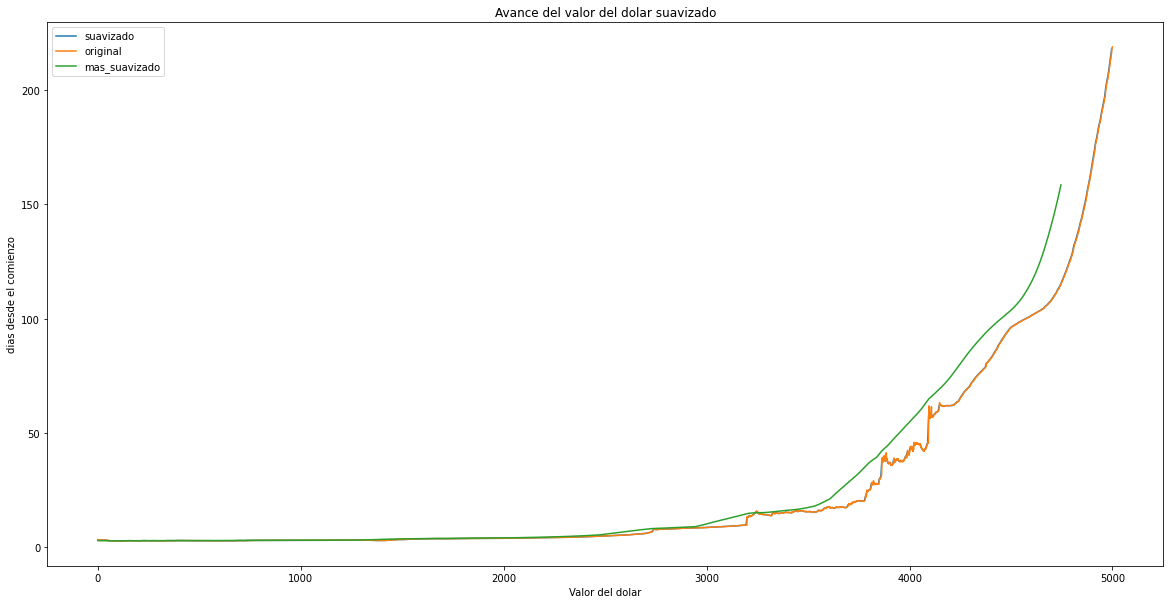

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(x=[i for i in range(0,len(dolar_suavizado))], y=dolar_suavizado['suavizado'])
sns.lineplot(x=[i for i in range(len(dolar_promedio))],y=dolar_promedio['promedio'])
sns.lineplot(x=[i for i in range(len(dolar_mas_suavizado))], y = dolar_mas_suavizado['mas_suavizado'])

plt.title("Avance del valor del dolar suavizado")
plt.xlabel("dias")
plt.ylabel("Valor del dolar")
plt.legend(["suavizado","original", "mas_suavizado"])
plt.show()

### Arrays a partir de los datos
Lo proximo es obtener los datos como dijimos que los ibamos a obtener
Los proximo bloques de codigo hacen exactamente eso.
Primero definimos los arrays, y luego formaremos las columnas de X, y las columnas de y. Paralelamente, formaremos un array y_for_testing, para que tenga las dimensiones correcta, pero con los valores originales del valor del dolar.

In [ ]:
import numpy as np
# eleccion, ventana = dolar_mas_suavizado[['mas_suavizado']], 32
eleccion, ventana = dolar_suavizado['suavizado'], 5
# suavizado_array = np.array(dolar_promedio['mas_suavizado'])
X_array = []
y_array = []
y_for_testing = []

In [ ]:
hace_dias = []  # esto nos servira para nombrar las columnas en nuestro dataset luego.
PERIODO = 23 # Cuantas columnas tendra nuestra X.
# Cada columna ser aproximadamente INCREMENTO numero de dias que la columna anterior. Si incremento es 2, nuestras columnas seran:
# promedio de ultimos dos dias, promedio de ultimos 4 dias, promedio de ultimos 8 dias, etc. Pueden jugar con el incremento tambien.
INCREMENTO = 1.6
for i in range(len(eleccion)):
    some_nan = False
    final = i + PERIODO + 1
    try:

        to_append = []
        for j in range(1,PERIODO):
            if i == 25:
                hace_dias.append(int(INCREMENTO*(j+1)))
            mean = eleccion.iloc[final-(int(INCREMENTO*(j+1))):final-1].mean()
            to_append.append(mean)
            if np.isnan(mean):
                some_nan = True
                break
        if not some_nan:
            y_array.append(eleccion.iloc[final])
            y_for_testing.append(dolar_promedio['promedio'].iloc[i+PERIODO+1])
            X_array.append(to_append)

    except (IndexError, KeyError):
        pass

### Sanity check
Siempre es bueno observar lo que vamos obteniendo para estar seguros que nos obtuvimos nada raro. Los proximos bloques de codigo pueden ignorarlos, no son mas que una "prueba de cordura".

In [ ]:
X_array_v = np.array(X_array)
y_array_v = np.array(y_array)

In [ ]:
X_array_v[0]

array([3.19066667, 3.19044444, 3.19106667, 3.184     , 3.17925   ,
       3.17113333, 3.16824242, 3.16651282, 3.168     , 3.17008333,
       3.179     , 3.18470175, 3.19349206, 3.194     , 3.19241667,
       3.19102564, 3.19185185, 3.19664368, 3.2036129 , 3.20720833,
       3.21431373, 3.21754286])

In [ ]:
np.isnan(X_array_v)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### Reconstruimos un dataset de pandas
Ya que siempre es mas facil trabajar con pandas... a menos que estamos intentando hacer que tengan bebes ...

In [ ]:
len(hace_dias)


22

In [ ]:
datos_df = pd.DataFrame(X_array_v, columns = ["Hace " + str(i) + " dias" for i in hace_dias])
datos_df['y'] = y_array_v

In [ ]:
datos_df

,Hace 3 dias,Hace 4 dias,Hace 6 dias,Hace 8 dias,Hace 9 dias,Hace 11 dias,Hace 12 dias,Hace 14 dias,Hace 16 dias,Hace 17 dias,...,Hace 24 dias,Hace 25 dias,Hace 27 dias,Hace 28 dias,Hace 30 dias,Hace 32 dias,Hace 33 dias,Hace 35 dias,Hace 36 dias,y
0,3.190667,3.190444,3.191067,3.184000,3.179250,3.171133,3.168242,3.166513,3.168000,3.170083,...,3.194000,3.192417,3.191026,3.191852,3.196644,3.203613,3.207208,3.214314,3.217543,3.193333
1,3.188000,3.188889,3.189467,3.188000,3.184167,3.176133,3.172424,3.168256,3.168222,3.169083,...,3.194319,3.193639,3.191000,3.190815,3.193494,3.199634,3.203042,3.210137,3.213486,3.199333
2,3.189333,3.189778,3.190000,3.190571,3.188667,3.181267,3.177697,3.171487,3.169556,3.169792,...,3.193130,3.194278,3.192179,3.191086,3.191678,3.196172,3.199437,3.206157,3.209657,3.200667
3,3.196333,3.192667,3.191867,3.191429,3.191667,3.186600,3.182909,3.176103,3.172000,3.171417,...,3.190232,3.193389,3.193846,3.192444,3.191195,3.193677,3.196271,3.202647,3.205962,3.199333
4,3.200000,3.197778,3.193867,3.192857,3.192583,3.190933,3.187879,3.181128,3.175289,3.173792,...,3.186435,3.190667,3.194718,3.194099,3.191701,3.192215,3.193896,3.199471,3.202590,3.193333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,213.505333,213.207111,212.599600,211.967048,211.634083,210.984600,210.664424,210.046462,209.451600,209.164333,...,207.335797,207.078111,206.541205,206.254000,205.665011,205.073742,204.782479,204.210863,203.930876,215.040000
4957,214.134000,213.825111,213.216267,212.598857,212.279250,211.625133,211.300970,210.669846,210.059378,209.764917,...,207.890145,207.632833,207.109846,206.834667,206.255011,205.661441,205.367208,204.787824,204.503829,215.965333
4958,214.752333,214.436000,213.825200,213.214667,212.904000,212.257733,211.935576,211.293333,210.673911,210.370667,...,208.444957,208.188056,207.668436,207.403556,206.840092,206.251290,205.954521,205.368941,205.080743,216.758000
4959,215.502667,215.156667,214.496133,213.869524,213.558500,212.923933,212.594788,211.947385,211.314222,211.004625,...,209.018522,208.758306,208.238205,207.975728,207.432460,206.851634,206.554854,205.963412,205.671695,217.422000


In [ ]:
datos_df.to_csv("datos_trabajo_final_2.csv")

No se asusten si el entrenamiento y la validacion son asi, recuerden de donde vienen los datos ...
En uno de los entrenamientos, el costo me salio asi:
![Costo](https://drive.google.com/uc?export=view&id=1pZYfjwGiqWI1jJwj-l3YbI5YT_XBeZMv)

El error porcentual medio me salio asi:
![Error porcentual medio](https://drive.google.com/uc?export=view&id=1RwvelBv_bDlEtjWEwYlj_GHlbZ8d113V)

Y los valores reales, vs los predichos me dieron algo asi en el mismo entrenamiento:
![Valores verdaderos vs valores predichos](https://drive.google.com/uc?export=view&id=16-EW1gTu3-GnS0l79lOnbdPr7JLeEHg7)





### Consigna!!!!
1. Quiero que implementen ***al menos 3*** modelos, ya sea cambiando: hiperparametros, o algo de los datos.
2. Comparen el rendimiento de los modelos utilizando las metricas de evaluacion vistas en clases (al menos dos), justifiquen por que eligieron esas metricas de evaluacion.
3. El entregable final es una jupyter notebook (puede ser un link a colab) donde se ve implementado:
    - Los tres modelos con su codigo correspondiente.
    - El codigo para evaluar los modelos.
    - La comparacion de los modelos utilizando las metricas de evaluacion vistas en clases. Pueden utilizar los bloques de markdown (como este que estan leyendo) para realizar esta comparacion `teorica`.
4. Quiero y espero que empiecen su propio colab, desde cero. Pueden copiar y pegar los proximos dos bloques de codigo para arrancar, pero eso es todo. Buena suerte y hasta luego!

Se eligieron estas métricas porque son ampliamente utilizadas y proporcionan información útil sobre el rendimiento de un modelo de regresión. El MSE permite evaluar la precisión numérica del modelo y el R^2 proporciona una medida de la bondad del ajuste global. Combinando ambas métricas, se obtiene una visión más completa del rendimiento del modelo

In [11]:
import pandas as pd

url = 'https://drive.google.com/uc?id=1xEoQV1yaTWp_NQEg9br-IfMY6K7UdUIY'
datos_dolar = pd.read_csv(url, index_col=0)

datos_dolar.head()



,Hace 3 dias,Hace 4 dias,Hace 6 dias,Hace 8 dias,Hace 9 dias,Hace 11 dias,Hace 12 dias,Hace 14 dias,Hace 16 dias,Hace 17 dias,...,Hace 24 dias,Hace 25 dias,Hace 27 dias,Hace 28 dias,Hace 30 dias,Hace 32 dias,Hace 33 dias,Hace 35 dias,Hace 36 dias,y
0,3.190667,3.190444,3.191067,3.184000,3.179250,3.171133,3.168242,3.166513,3.168000,3.170083,...,3.194000,3.192417,3.191026,3.191852,3.196644,3.203613,3.207208,3.214314,3.217543,3.193333
1,3.188000,3.188889,3.189467,3.188000,3.184167,3.176133,3.172424,3.168256,3.168222,3.169083,...,3.194319,3.193639,3.191000,3.190815,3.193494,3.199634,3.203042,3.210137,3.213486,3.199333
2,3.189333,3.189778,3.190000,3.190571,3.188667,3.181267,3.177697,3.171487,3.169556,3.169792,...,3.193130,3.194278,3.192179,3.191086,3.191678,3.196172,3.199438,3.206157,3.209657,3.200667
3,3.196333,3.192667,3.191867,3.191429,3.191667,3.186600,3.182909,3.176103,3.172000,3.171417,...,3.190232,3.193389,3.193846,3.192444,3.191195,3.193677,3.196271,3.202647,3.205962,3.199333
4,3.200000,3.197778,3.193867,3.192857,3.192583,3.190933,3.187879,3.181128,3.175289,3.173792,...,3.186435,3.190667,3.194718,3.194099,3.191701,3.192215,3.193896,3.199471,3.202590,3.193333


### Separacion entre

In [13]:
url_y_testeo = 'https://drive.google.com/uc?id=1x5h1kxbCEku4MV05ST9btUSSrK6Gcl3M'

first_test = int(len(datos_dolar)*0.9)
teteo_definitivo = datos_dolar.iloc[first_test:]
X = datos_dolar.iloc[:first_test]
print(X)
X = datos_dolar.drop(columns=['y'])
print(X)

y = datos_dolar[['y']]

first_val = int(len(X)*0.8)
X_train = X.iloc[:first_val]

y_train = y.iloc[:first_val]

# Solo pueden tocar estos valores una vez ...
X_test = X.iloc[first_val:]
y_test = pd.read_csv(url_y_testeo, index_col = 0)



      Hace 3 dias  Hace 4 dias  Hace 6 dias  Hace 8 dias  Hace 9 dias  \
0        3.190667     3.190444     3.191067     3.184000     3.179250   
1        3.188000     3.188889     3.189467     3.188000     3.184167   
2        3.189333     3.189778     3.190000     3.190571     3.188667   
3        3.196333     3.192667     3.191867     3.191429     3.191667   
4        3.200000     3.197778     3.193867     3.192857     3.192583   
...           ...          ...          ...          ...          ...   
4459    95.536667    95.492000    95.377733    95.254190    95.192167   
4460    95.639667    95.591778    95.490400    95.370762    95.310167   
4461    95.751000    95.693111    95.595600    95.484381    95.424417   
4462    95.858333    95.806222    95.698400    95.595524    95.538417   
4463    95.975333    95.916889    95.806000    95.704095    95.650333   

      Hace 11 dias  Hace 12 dias  Hace 14 dias  Hace 16 dias  Hace 17 dias  \
0         3.171133      3.168242      3.16651